In [1]:
import tensorflow as tf
(X_train, y_train), (X_test, y_test) =  tf.keras.datasets.mnist.load_data(
    path='mnist.npz'
)

In [2]:
import matplotlib.pyplot as plt

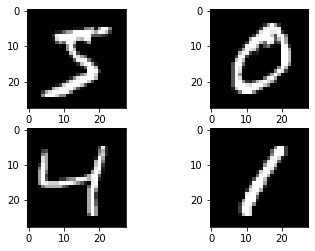

In [3]:
# plot 4 images as gray scale
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [4]:
Sequential = tf.keras.Sequential

In [5]:
Dense = tf.keras.layers.Dense

In [6]:
Dropout = tf.keras.layers.Dropout

In [7]:
np_utils = tf.keras.utils.to_categorical

In [8]:
# flatten 28*28 images to a 784 vector for each image
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape((X_train.shape[0], num_pixels)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], num_pixels)).astype('float32')

In [9]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255

In [10]:
# one hot encode outputs
y_train = np_utils(y_train)
y_test = np_utils(y_test)
num_classes = y_test.shape[1]

In [11]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(num_pixels, input_dim=num_pixels, kernel_initializer='normal', activation='relu'))
    model.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [12]:
# build the model
model = baseline_model()
# Fit the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=200, verbose=2)
# Final evaluation of the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

Epoch 1/20
300/300 - 2s - loss: 0.2813 - accuracy: 0.9202 - val_loss: 0.1472 - val_accuracy: 0.9579
Epoch 2/20
300/300 - 2s - loss: 0.1114 - accuracy: 0.9678 - val_loss: 0.0930 - val_accuracy: 0.9732
Epoch 3/20
300/300 - 2s - loss: 0.0710 - accuracy: 0.9797 - val_loss: 0.0784 - val_accuracy: 0.9757
Epoch 4/20
300/300 - 2s - loss: 0.0500 - accuracy: 0.9858 - val_loss: 0.0692 - val_accuracy: 0.9796
Epoch 5/20
300/300 - 2s - loss: 0.0348 - accuracy: 0.9903 - val_loss: 0.0669 - val_accuracy: 0.9779
Epoch 6/20
300/300 - 2s - loss: 0.0273 - accuracy: 0.9923 - val_loss: 0.0605 - val_accuracy: 0.9808
Epoch 7/20
300/300 - 2s - loss: 0.0202 - accuracy: 0.9949 - val_loss: 0.0585 - val_accuracy: 0.9826
Epoch 8/20
300/300 - 2s - loss: 0.0149 - accuracy: 0.9966 - val_loss: 0.0622 - val_accuracy: 0.9806
Epoch 9/20
300/300 - 2s - loss: 0.0117 - accuracy: 0.9973 - val_loss: 0.0559 - val_accuracy: 0.9827
Epoch 10/20
300/300 - 2s - loss: 0.0076 - accuracy: 0.9987 - val_loss: 0.0592 - val_accuracy: 0.9816